<a href="https://colab.research.google.com/github/muski10/Deep-learning/blob/main/Activity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#REG NO 20MAI0036

In [ ]:
https://github.com/muski10

In [ ]:
#importing library
import numpy as np

In [ ]:
val = ([2,3],[5,6],[8,9])
print("Training input values with no Bias\n", val)

Training input values with no Bias
 ([2, 3], [5, 6], [8, 9])


In [ ]:
#Adding Bias to the input values
test2 = [[-1]] * len(val)
val = np.concatenate((test2, val), axis = 1)  
print("Training input values with bias\n",val)

Training input values with bias
 [[-1  2  3]
 [-1  5  6]
 [-1  8  9]]


In [ ]:
#Creating random weights
p=3     #number of elements in each row of inputs
q=1 
wts = np.random.rand(p,q)*0.1 - 0.5
print("Initial random weights\n",wts)

Initial random weights
 [[-0.48470584]
 [-0.4051108 ]
 [-0.4899242 ]]


In [ ]:
#Target values Matrix
final = ([0],[1],[1])
print("Training data target values are\n", final)

Training data target values are
 ([0], [1], [1])


In [ ]:
#Method for updating weights
def updateWeights(wts, inputs, activation, targets):
    eta = 0.25
    wts += eta*np.dot(np.transpose(inputs), targets - activation)
    return wts

In [ ]:
#Creating Methods for Learning
def  prediction (inputs, wts, targets):
    #representing Activation function with 'ack [[]]' variable
    ack = [[0]] * len(inputs)
    for i in range(0, len(inputs)):    
        for j in range(0,len(wts)):
            ack[i] += inputs[i][j] * wts[j]
        ack[i] = np.where(ack[i]>0, 1, 0)
        #checking values with target
        if(targets[i] != ack[i]):
            wts = updateWeights(wts, inputs, ack[i], targets)
        print(ack[i])
    return wts

In [ ]:
#Training our model and extracting stable weights
itr = 5
for temp in range(0, itr):
    print("\nItr ",temp+1,"\n")
    wts = prediction(values, wts, final)
    
print("\nupdated Weights\n", wts)


Itr  1 

[0]
[1]
[1]

Itr  2 

[0]
[1]
[1]

Itr  3 

[0]
[1]
[1]

Itr  4 

[0]
[1]
[1]

Itr  5 

[0]
[1]
[1]

updated Weights
 [[ 1.01529416]
 [ 1.0948892 ]
 [-0.4899242 ]]


In [ ]:
#Testing our own data
def perceptronPredict(wts, newInput):
    ac = np.dot(newInput, wts)
    ac = np.where(ac>0, 1, 0)
    print(ac)


newInput = ([-1.0, 7, 8])
perceptronPredict(wts, newInput)

[1]


In [ ]:
#activity2

In [ ]:
# Importing the libraries
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing dataset
dataset =pd.read_csv("/content/drive/MyDrive/loan.csv")

In [ ]:
# Check the number of rows and columns in the dataframe
dataset.shape

(10000, 14)

In [ ]:
# Get a summary of the dataframe using 'head'
dataset.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [ ]:
#After analysing the data we come to conclusion
#Creating new column 'date_issued_dt'
dataset['date_issued_dt'] = pd.to_datetime(dataset['date_issued'])

In [ ]:
#After analysing the data we come to conclusion
#Creating new column 'date_last_payment_dt'
#Data cleaning
dataset['date_last_payment_dt'] = pd.to_datetime(dataset['date_last_payment'])

In [ ]:
# To get the year in which loan was taken
#Craeted a new columnn year
dataset['year']= dataset['date_issued_dt'].dt.year

In [ ]:
# To get the month in which loan was taken
#Craeted a new columnn month
dataset['month']= dataset['date_issued_dt'].dt.month

In [ ]:
# To check the chnage is applied or not
dataset.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued_dt,date_last_payment_dt,year,month
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,2013-06-11,2016-01-14,2013,6
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,2014-05-08,2016-01-25,2014,5
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,2013-10-26,2014-09-26,2013,10
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,2015-08-20,2016-01-26,2015,8
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,2014-07-22,2016-01-11,2014,7


In [ ]:
#Checking for the shape
dataset.shape

(10000, 18)

In [ ]:
#Spliting the data into X and Y
#For train and test
X=dataset.iloc[:, [0,1,2,7,11,16,17]].values
y=dataset.iloc[:,9].values

In [ ]:
#Splitting into train and test set
#Train 90% Test 10%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state =0)

In [ ]:
#Importing Perceptron
from sklearn.linear_model import Perceptron
per1=Perceptron(random_state=0)

In [ ]:
per1.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred1=per1.predict(X_test)

In [ ]:
#Checking for the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred1)*100

Accuracy score


98.8

In [ ]:
#activity3

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

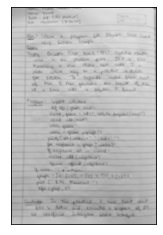

In [5]:
img = cv.imread('/content/drive/MyDrive/70108.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]),plt.yticks([])
plt.show()

In [7]:
dimensions = img.shape
 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[1]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (1903, 1273)
Image Height       :  1903
Image Width        :  1273
Number of Channels :  1273
